In [3]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
import matplotlib


#global values of constants
global hbar_
hbar_ = 1.0 #can be changed to scipy.constants.hbar
class wave:
    def __init__(self, mass, omega, n_, number_of_lattice_points = 500, xs_range = 10, findpsi = True):
        
        self.m = mass
        self.om = omega
        self.n = n_ + 1
        self.xs_range = xs_range
        self.N = number_of_lattice_points
        
        self.dx = self.xs_range / self.N
        self.xs = np.linspace(-self.xs_range/2, self.xs_range/2, self.N)
        
        self.V = self.harmonic_potential()
        self.psi, self.E_0_to_n = self.psi_num(findpsi = findpsi)
        
    def normalization_test(self):
        #don't need to * slef.dx because already normalized in creation
        return self.psi.sum()
        # print('c = ', test_sum)
        # print('error = ', "{:e}".format((np.abs(1 - test_sum) * 100)), '%')
    def E(self):
        return self.E_0_to_n[self.n]
    #Method for creation of harmonic potentials as numpy arrays
    def harmonic_potential(self):
        V = 1/2 * self.m * self.om**2 * self.xs**2
        return V
    def K_kl(self, k, l):
        if k==l:
            return hbar_**2 * np.pi**2 / (6 * self.m * self.dx**2) * (1 + 2 / self.N**2)
        else:
            return hbar_**2 * np.pi**2 / (self.m * self.N**2 * self.dx**2) * (-1)**(k-l) / np.sin(np.pi * (k-l) / self.N)**2
    #The Python code used to construct H and calculate its eigenvectors and eigenvalues
    def schrodinger1D(self, neigs=20, findpsi=False):
        # create the Hamiltonian Operator matrix:
        H = np.zeros((self.N, self.N))
        # implement the numerical derivative
        for k in range(self.N - 1):
            for l in range(self.N - 1):
                H[k, l] = self.K_kl(k, l)
        for k in range(self.N - 1):
            H[k, k] = H[k, k] + self.V[k]
        # obtain solutions from the matrix:
        [evl, evt] = np.linalg.eig(H)
        for i in range(neigs):
            # normalize the eigenvectors:
            evt[:, i] = evt[:, i] / np.sqrt(
                                    np.trapz(np.conj(
                                    evt[:,i])*evt[:,i],self.xs))
            # eigen values MUST be real:
            evl = np.real(evl)
        if findpsi == False:
            return evl
        else: 
            return evl, evt
    def psi_num(self, findpsi):
        # call the 1D Schrodinger solver:
        H = self.schrodinger1D(self.n, findpsi = findpsi)
        evl = H[0] # energy eigenvalues
        indices = np.argsort(evl)
        n = indices[self.n]
        E = evl[indices]
        if findpsi == True:
            evt = H[1] # eigenvectors
            psi = np.real(np.conj(evt[:, n]) * evt[:, n])
            return psi, E
        else:
            return np.zeros(self.N), E
    #simply plots real and imaginary parts of the function
    def plot(self):
        fig = plt.figure(figsize = (16, 8))
        ax1 = fig.add_subplot(111)
        ax1.set_xlabel(r'$x$', size = 25)
        ax1.xaxis.set_major_locator(plt.MultipleLocator(self.xs_range / 10))
        
        ax1.set_xlim([self.xs.min(), self.xs.max()])
        ax1.set_ylabel(r'$|\Psi(x)|^2 $', size = 25)
        

        ax1.plot(self.xs, self.psi, label = r'\rho(x)')
        
        ax1.set_ylim(bottom = 0)
        ax2 = ax1.twinx()
        ax2.set_ylabel(r'$V(x)$', size = 25)
        ax2.plot(self.xs, self.V, color = 'green')
        ax2.set_ylim(bottom = 0)
        plt.show()
    @staticmethod
    def plot_delta_E(points = 20, N = 1000, x_range = 20):
        T = np.empty(points)
        t = wave(1, 1, points, number_of_lattice_points = N, xs_range = x_range)
        for i in range(points):
            ans = np.abs(t.E_0_to_n[i + 1] - hbar_* t.om * (i + .5))
            ans /= hbar_*t.om
            T[i] = ans
        fig = plt.figure(figsize = (16, 8))
        ax1 = fig.add_subplot(111)
        ax1.set_xlabel(r'$n$', size = 25)
        ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
        ax1.set_xlim([0, points])
        
        
        ax1.set_ylabel(r'$[E(DVR)-\hbar \omega\left(n+\frac{1}{2}\right)]/\hbar \omega $', size = 25)
        ax1.set_ylim([0, T.max()])
        #ax1.set_yscale("log", base=10)
        ax1.grid(which = 'major', axis = 'y')
        
        
        ax1.plot(T, 'go')
        plt.show()

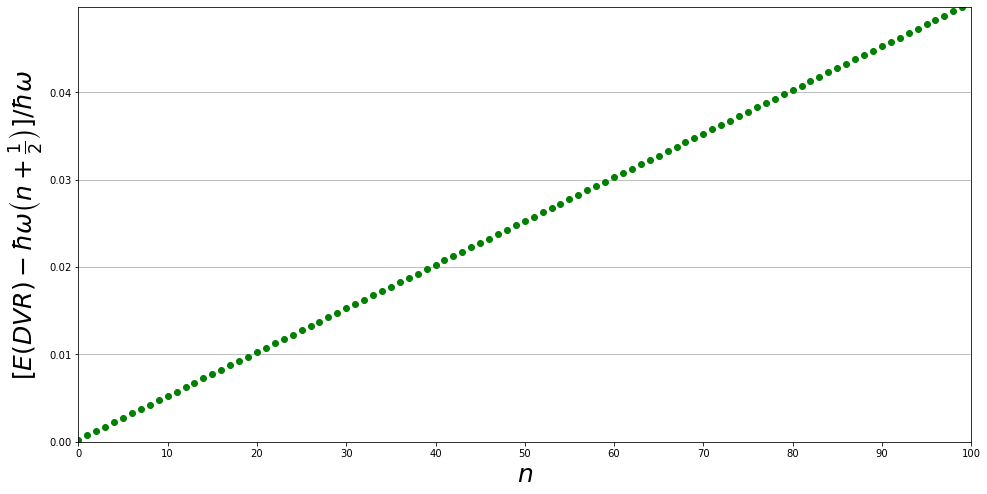

In [4]:
wave.plot_delta_E(100, N = 2000, x_range = 32)